In [1]:
import pandas as pd
import os
from IPython.display import SVG

# shut off warnings
from rdkit import RDLogger                                                                                                                                                               
RDLogger.DisableLog('rdApp.*')  

from utils import proc_interpret_df, interpretation_increase_resolution

In [2]:
# grab dataframe with interpretation results
path = '../out/controls/interpretation_of_frags_compared_to_rationales/'
res_df = pd.read_csv(path + 'interpretation_results_to_see_if_frags_match_rationales_v1_03152023.txt', sep = '\t')
df = proc_interpret_df(res_df)

# merge with metadata including fragments
meta = pd.read_csv('../../generativeML/out/successful_combined_cpd_and_frag_results_up_through_round5_01182023.csv')
df = meta.merge(df, on = 'compound_SMILES')
display(df.head(5))

,Unnamed: 0,Round,ID,Name,compound_SMILES,fragment_SMILES,Compound_of_Interest,orig_score,rationale,rationale_score
0,0,Round1-Pilot,BRD-K06931542-001-01-8,"1H-Benzimidazole, 5-chloro-2-(methylthio)-6-(2...",CSc1nc2cc(Oc3ccc4ccccc4c3)c(Cl)cc2[nH]1,OC1=CC2=C(NC=N2)C=C1Cl,N,0.245,Clc1c[cH:1][cH:1]cc1Oc1cc[cH:1][cH:1]c1,0.116
1,1,Round1-Pilot,BRD-K06931542-001-01-8,"1H-Benzimidazole, 5-chloro-2-(methylthio)-6-(2...",CSc1nc2cc(Oc3ccc4ccccc4c3)c(Cl)cc2[nH]1,OC1=CC2=C(C=C1Cl)N=CN2,N,0.245,Clc1c[cH:1][cH:1]cc1Oc1cc[cH:1][cH:1]c1,0.116
2,2,Round1-Pilot,BRD-K53482787-001-01-8,BRD-K53482787-001-01-8,O[C@H]1COC[C@H]2O[C@@H](CC(=O)NCc3ccc(Cl)c(Cl)...,CNCC1=CC=C(Cl)C(Cl)=C1,N,0.240,Clc1ccc([NH2:1])cc1Cl,0.155
3,3,Round1-Pilot,BRD-K32533226-001-01-3,AGN 195183,CC1(C)CCC(C)(C)c2c(Cl)c(O)c(cc12)C(=O)Nc1cc(F)...,CCCCc1cccc(O)c1,N,0.363,Oc1c([CH2:1]Nc2c[cH:1][cH:1][cH:1]c2)c[cH:1][c...,0.146
4,4,Round1-Pilot,BRD-K32533226-001-01-3,AGN 195183,CC1(C)CCC(C)(C)c2c(Cl)c(O)c(cc12)C(=O)Nc1cc(F)...,CCCC1=CC=C(O)C(Cl)=C1,N,0.363,Oc1c([CH2:1]Nc2c[cH:1][cH:1][cH:1]c2)c[cH:1][c...,0.146



-----------------------------------------------------------------------
Name:  954718-28-6


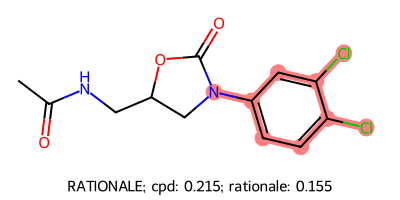

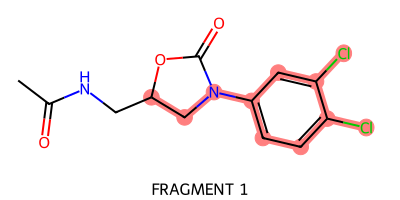


-----------------------------------------------------------------------
Name:  BRD-K79529816


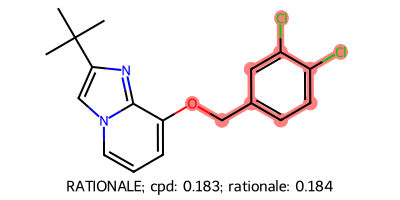

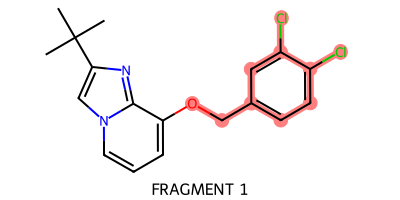

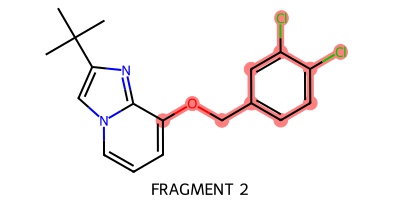


-----------------------------------------------------------------------
Name:  AGN 195183


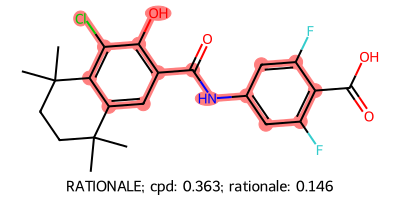

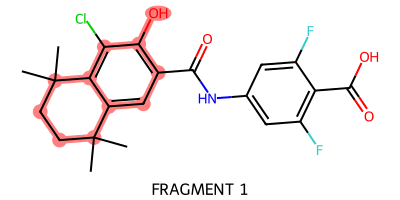

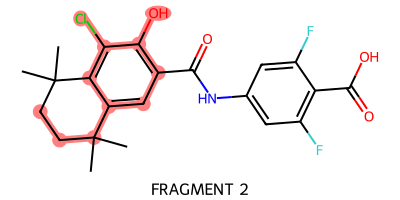


-----------------------------------------------------------------------
Name:  BRD-K32533226


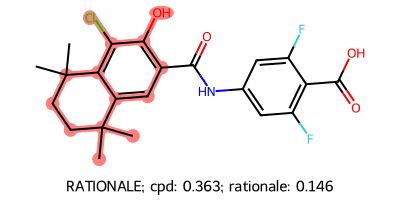

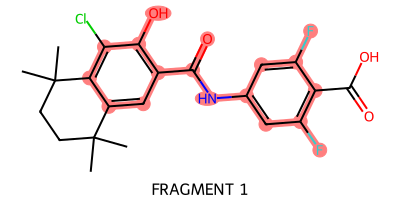


-----------------------------------------------------------------------
Name:  V027-1394


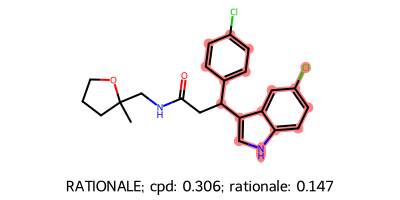

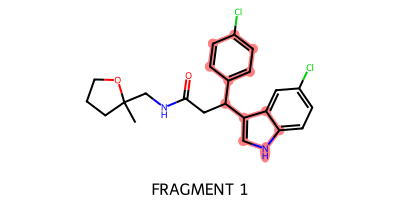

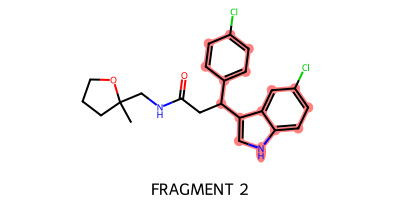


-----------------------------------------------------------------------
Name:  BRD-A29973139


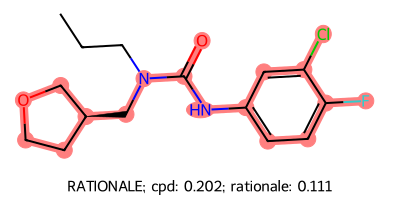

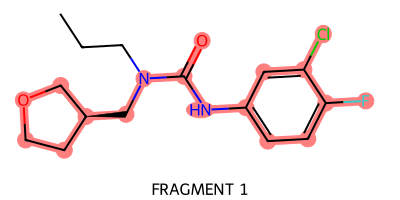

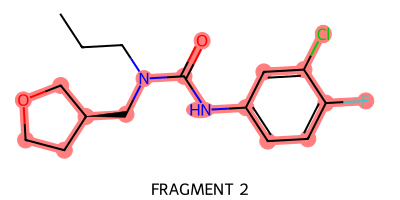

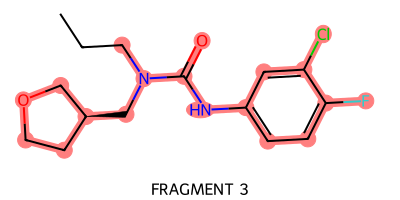


-----------------------------------------------------------------------
Name:  BRD-K25297725


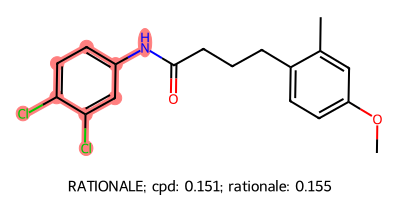

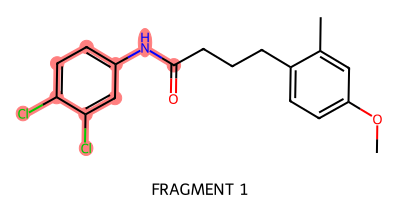

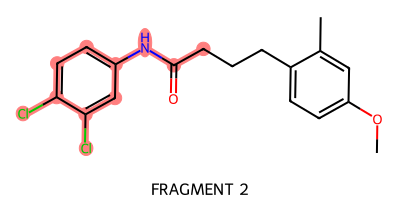

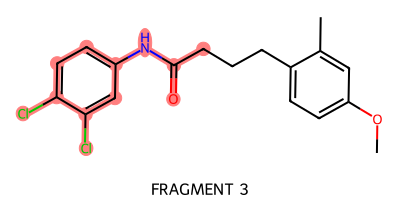


-----------------------------------------------------------------------
Name:  BRD-K39227016


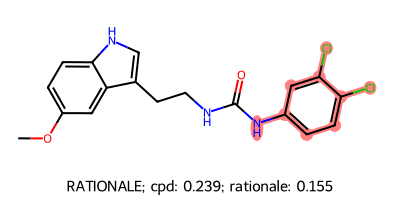

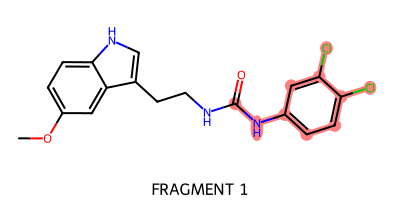

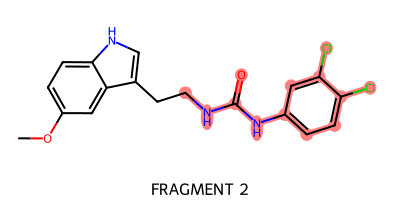


-----------------------------------------------------------------------
Name:  BRD-A65826572


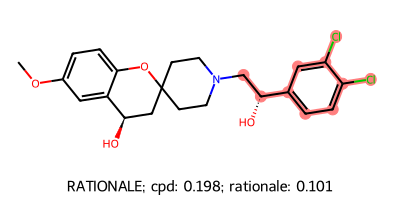

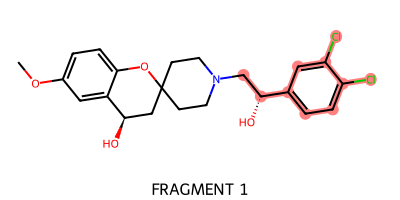

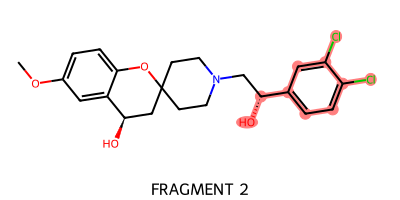

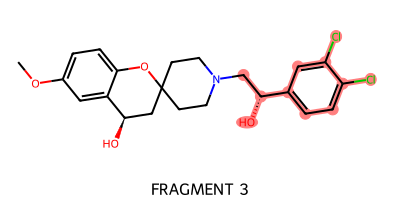


-----------------------------------------------------------------------
Name:  CBKinase1_006540


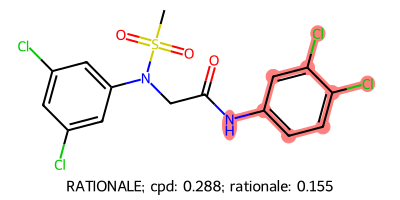

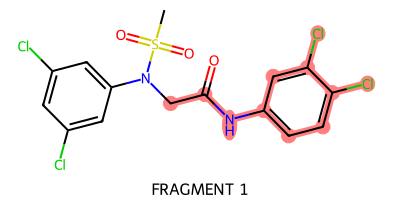


-----------------------------------------------------------------------
Name:  1H-Benzimidazole, 5-chloro-2-(methylthio)-6-(2-naphthalenyloxy)-


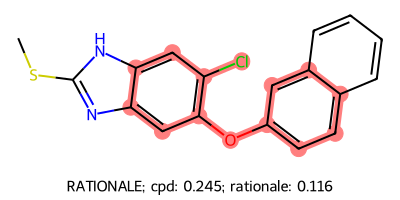

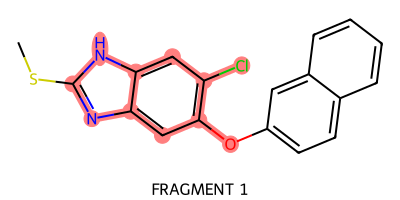

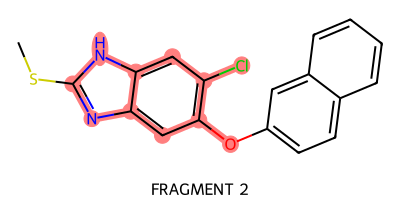


-----------------------------------------------------------------------
Name:  BRD-A66536342


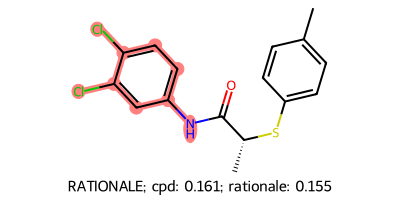

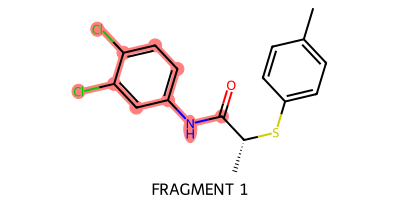

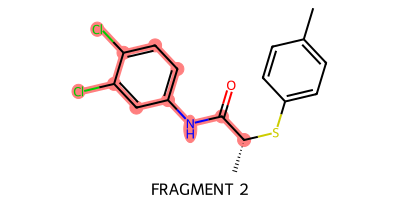

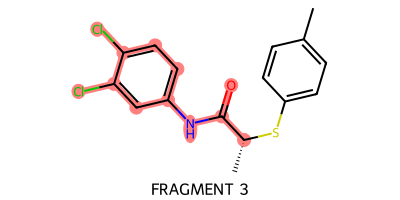


-----------------------------------------------------------------------
Name:  CL-298741;YTR-830H


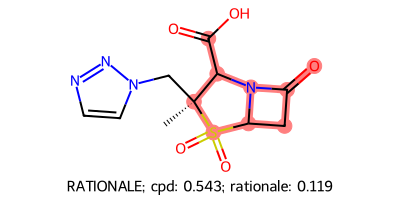

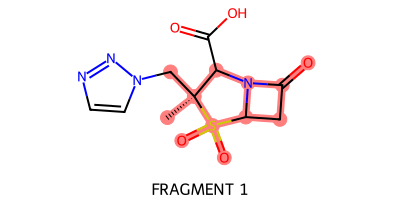


-----------------------------------------------------------------------
Name:  SPB02276


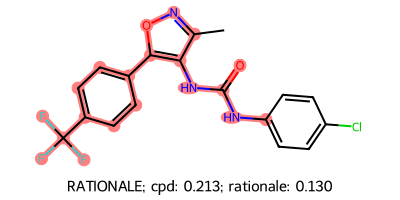

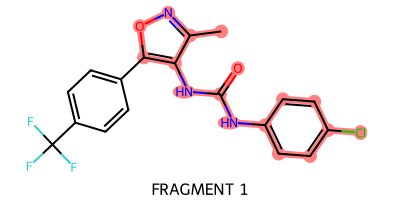


-----------------------------------------------------------------------
Name:  SPB00067


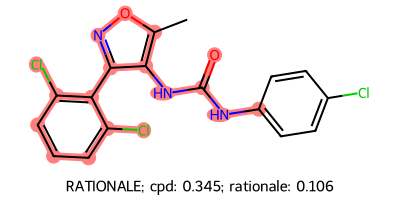

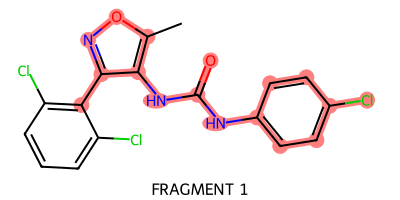


-----------------------------------------------------------------------
Name:  2,4-dichloro-N-(3,4-dichlorophenyl)benzamide


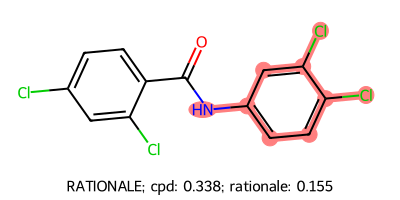

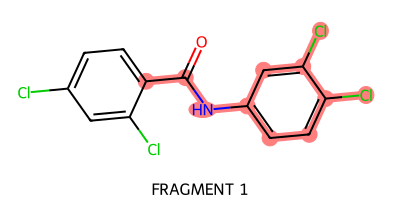


-----------------------------------------------------------------------
Name:  V027-1406


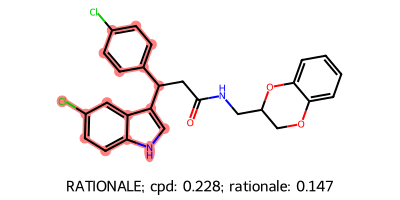

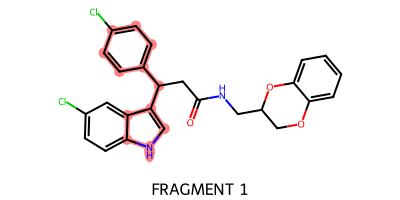

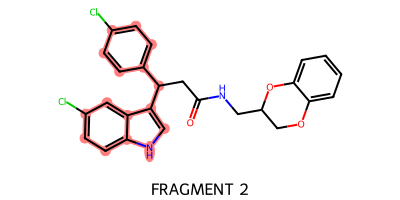


-----------------------------------------------------------------------
Name:  BRD-A19217117


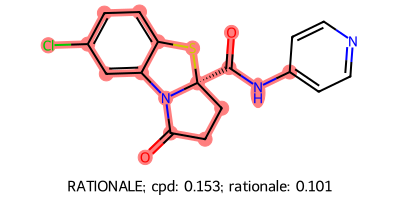

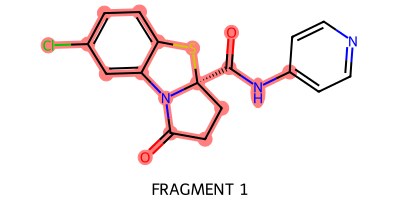


-----------------------------------------------------------------------
Name:  STL372099


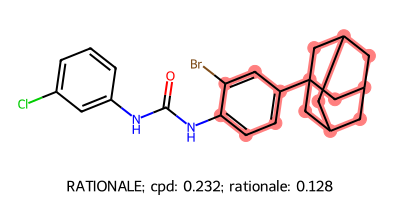

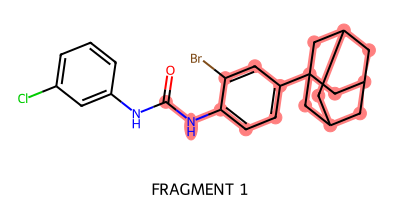


-----------------------------------------------------------------------
Name:  BRD-K79933602


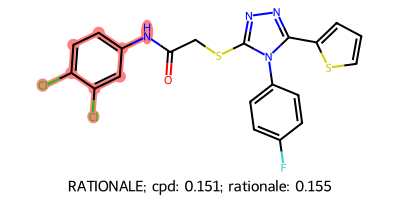

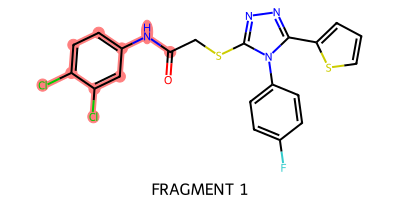

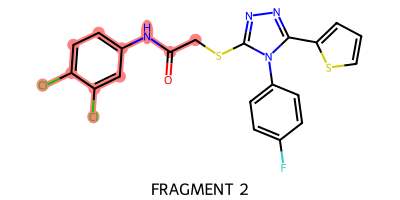

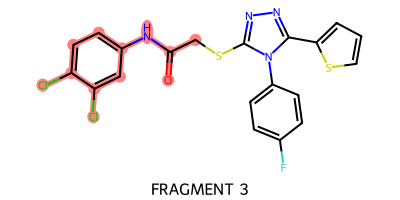


-----------------------------------------------------------------------
Name:  JNJ-42041935


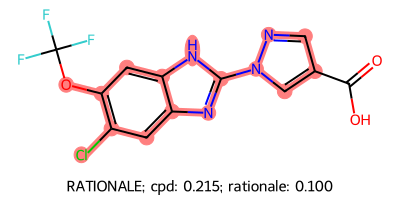

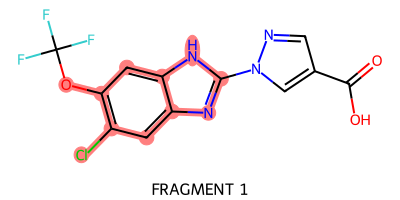

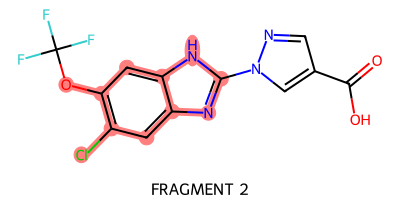


-----------------------------------------------------------------------
Name:  BRD-A81029847


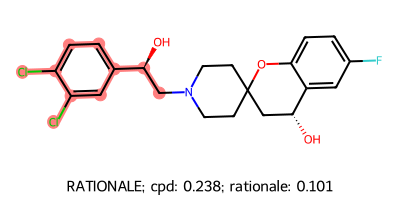

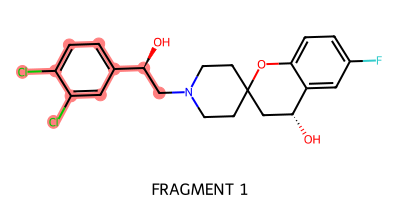

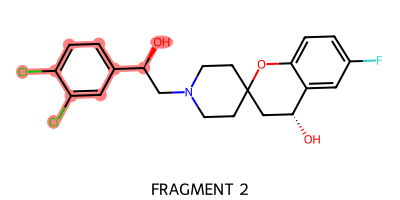

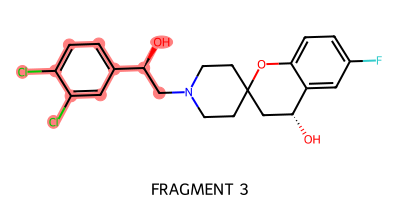


-----------------------------------------------------------------------
Name:  BRD-A52163878


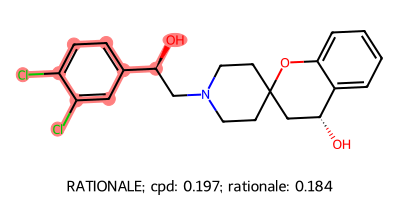

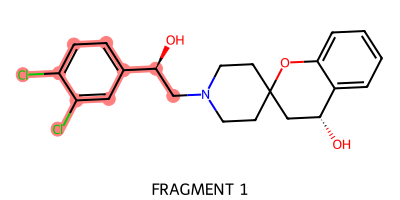

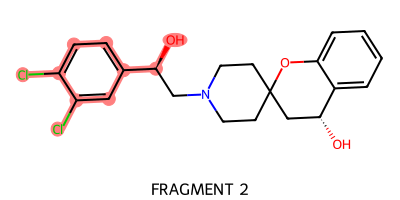

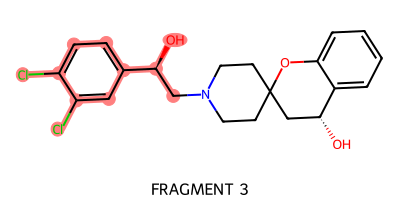


-----------------------------------------------------------------------
Name:  BRD-K55448741-001-01-2


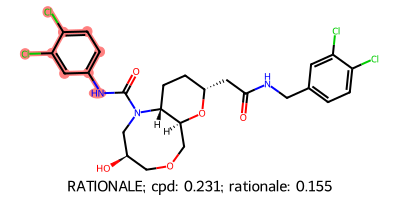

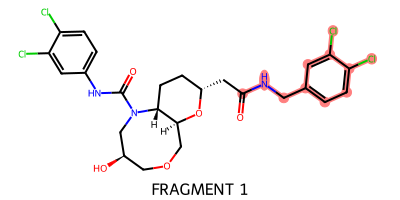


-----------------------------------------------------------------------
Name:  BRD-K72531819-001-01-1


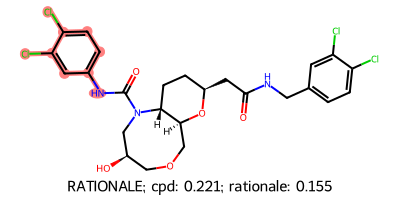

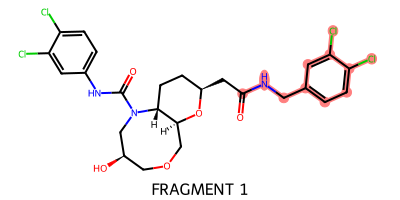


-----------------------------------------------------------------------
Name:  BRD-K26931203-001-01-4


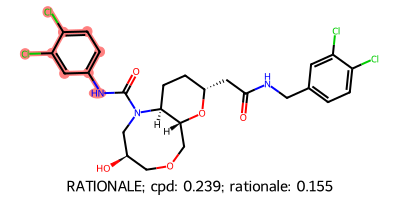

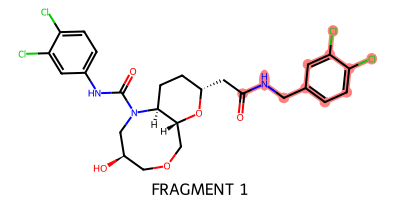


-----------------------------------------------------------------------
Name:  BRD-K28984605-001-01-5


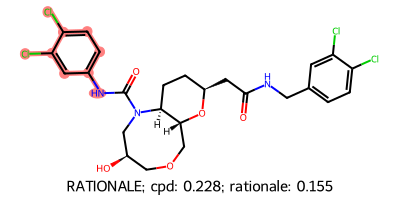

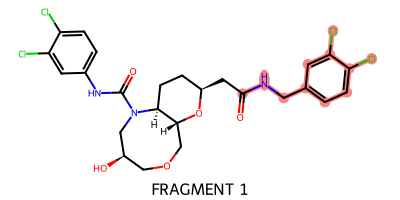


-----------------------------------------------------------------------
Name:  BRD-K83820188-001-01-8


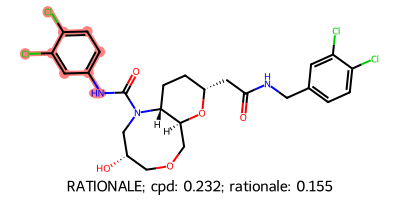

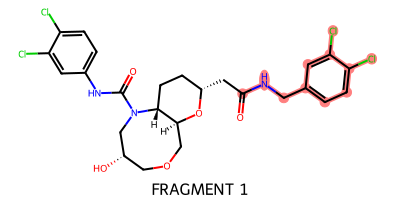


-----------------------------------------------------------------------
Name:  BRD-K53482787-001-01-8


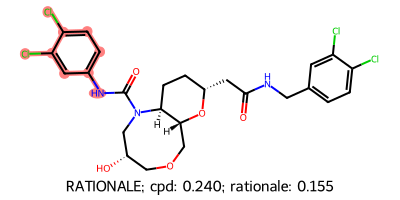

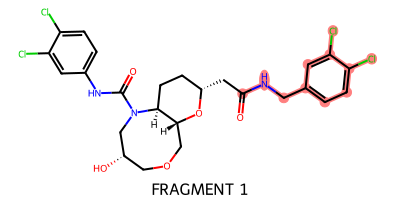


-----------------------------------------------------------------------
Name:  BRD-K36648601-001-01-0


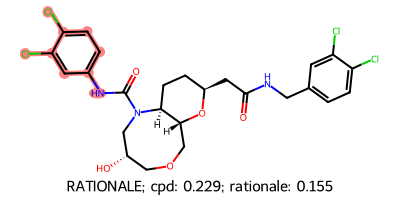

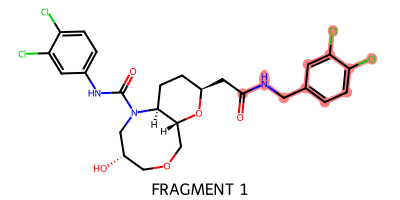

In [3]:
results_path = path + 'rationales_vis/'
#os.mkdir(results_path)

for cpd, smalldf in df.groupby('compound_SMILES'):
    smalldf =smalldf.reset_index(drop = True)
    for i, line in smalldf.iterrows():
        name = line['Name']

        orig_smi = line['compound_SMILES']
        orig_sco = line['orig_score']
        rat_smi = line['rationale']
        rat_sco = line['rationale_score'] 
        frag_smi = line['fragment_SMILES']

        if rat_sco != '':
            if i == 0:
                print('')
                print('-----------------------------------------------------------------------')
                print('Name: ', name)

                img1 = SVG(interpretation_increase_resolution(orig_smi, rat_smi, kekulize=True, legend = 'RATIONALE; cpd: ' + str(orig_sco) + '; rationale: ' + str(rat_sco), file_path = results_path + name + '_rationale'))
                display(img1)
                img2 = SVG(interpretation_increase_resolution(orig_smi, frag_smi, kekulize=True, legend = 'FRAGMENT 1', file_path = results_path + name + '_fragment_' + str(i)))
                display(img2)
            else:
                img2 = SVG(interpretation_increase_resolution(orig_smi, frag_smi, kekulize=True, legend = 'FRAGMENT ' + (str(i+1)), file_path = results_path + name + '_fragment_' + str(i)))
                display(img2)
                